In [1]:
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df_adult = pd.read_csv("adult.csv")
df_adult.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [3]:
df_adult.columns = [col.replace('-', '_').lower() for col in df_adult.columns]
df_adult.columns  

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational_num',
       'marital_status', 'occupation', 'relationship', 'race', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [4]:
df_adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational_num  48842 non-null  int64 
 5   marital_status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital_gain     48842 non-null  int64 
 11  capital_loss     48842 non-null  int64 
 12  hours_per_week   48842 non-null  int64 
 13  native_country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
df_adult.workclass.unique()

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [6]:
df_adult[['workclass']].query('workclass == "?"').count()

workclass    2799
dtype: int64

In [7]:
df_adult.shape

(48842, 15)

In [8]:
df_adult.occupation.unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', '?',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

In [9]:
df_adult[['occupation']].query('occupation == "?"').count()

occupation    2809
dtype: int64

In [10]:
# % отсутствующих данных в колонке занятость
df_adult[['occupation']].query('occupation == "?"').count()/df_adult.shape[0]*100

occupation    5.751198
dtype: float64

In [11]:
# % данных в которых отсутсвуют оба атрибута
df_adult[['occupation', 'workclass', 'native_country']].query('occupation == "?" & workclass == "?" & native_country == "?"').count()/df_adult.shape[0]*100

occupation        0.094181
workclass         0.094181
native_country    0.094181
dtype: float64

In [12]:
df_adult.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational_num',
       'marital_status', 'occupation', 'relationship', 'race', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [13]:
# Заполнение пропущенных данных

df1 = df_adult[['occupation', 'workclass', 'native_country', 'education', 'gender', 'race', 'relationship']].query('workclass == "?"')
df1['relationship'].value_counts()

relationship
Own-child         868
Husband           711
Not-in-family     666
Unmarried         258
Wife              191
Other-relative    105
Name: count, dtype: int64

In [14]:
# % данных в которых отсутсвует хотя бы один из атрибутов
df_adult[['occupation', 'workclass', 'native_country']].query('occupation == "?" | workclass == "?" | native_country == "?"').count()/df_adult.shape[0]*100

occupation        7.411654
workclass         7.411654
native_country    7.411654
dtype: float64

In [15]:
df_adult.describe()

,age,fnlwgt,educational_num,capital_gain,capital_loss,hours_per_week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [16]:
df_adult.drop_duplicates()

,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [17]:
# Для начала попробуем построить модель с удалением отсутвующих данных

df_adult_clean = df_adult.loc[(df_adult['occupation'] != "?") & (df_adult['workclass'] != "?") & (df_adult['native_country'] != "?")]
df_adult_clean.shape

(45222, 15)

In [18]:
# 92,6 % данных у нас сохранены

df_adult_clean.shape[0]/df_adult.shape[0]*100

92.58834609557348

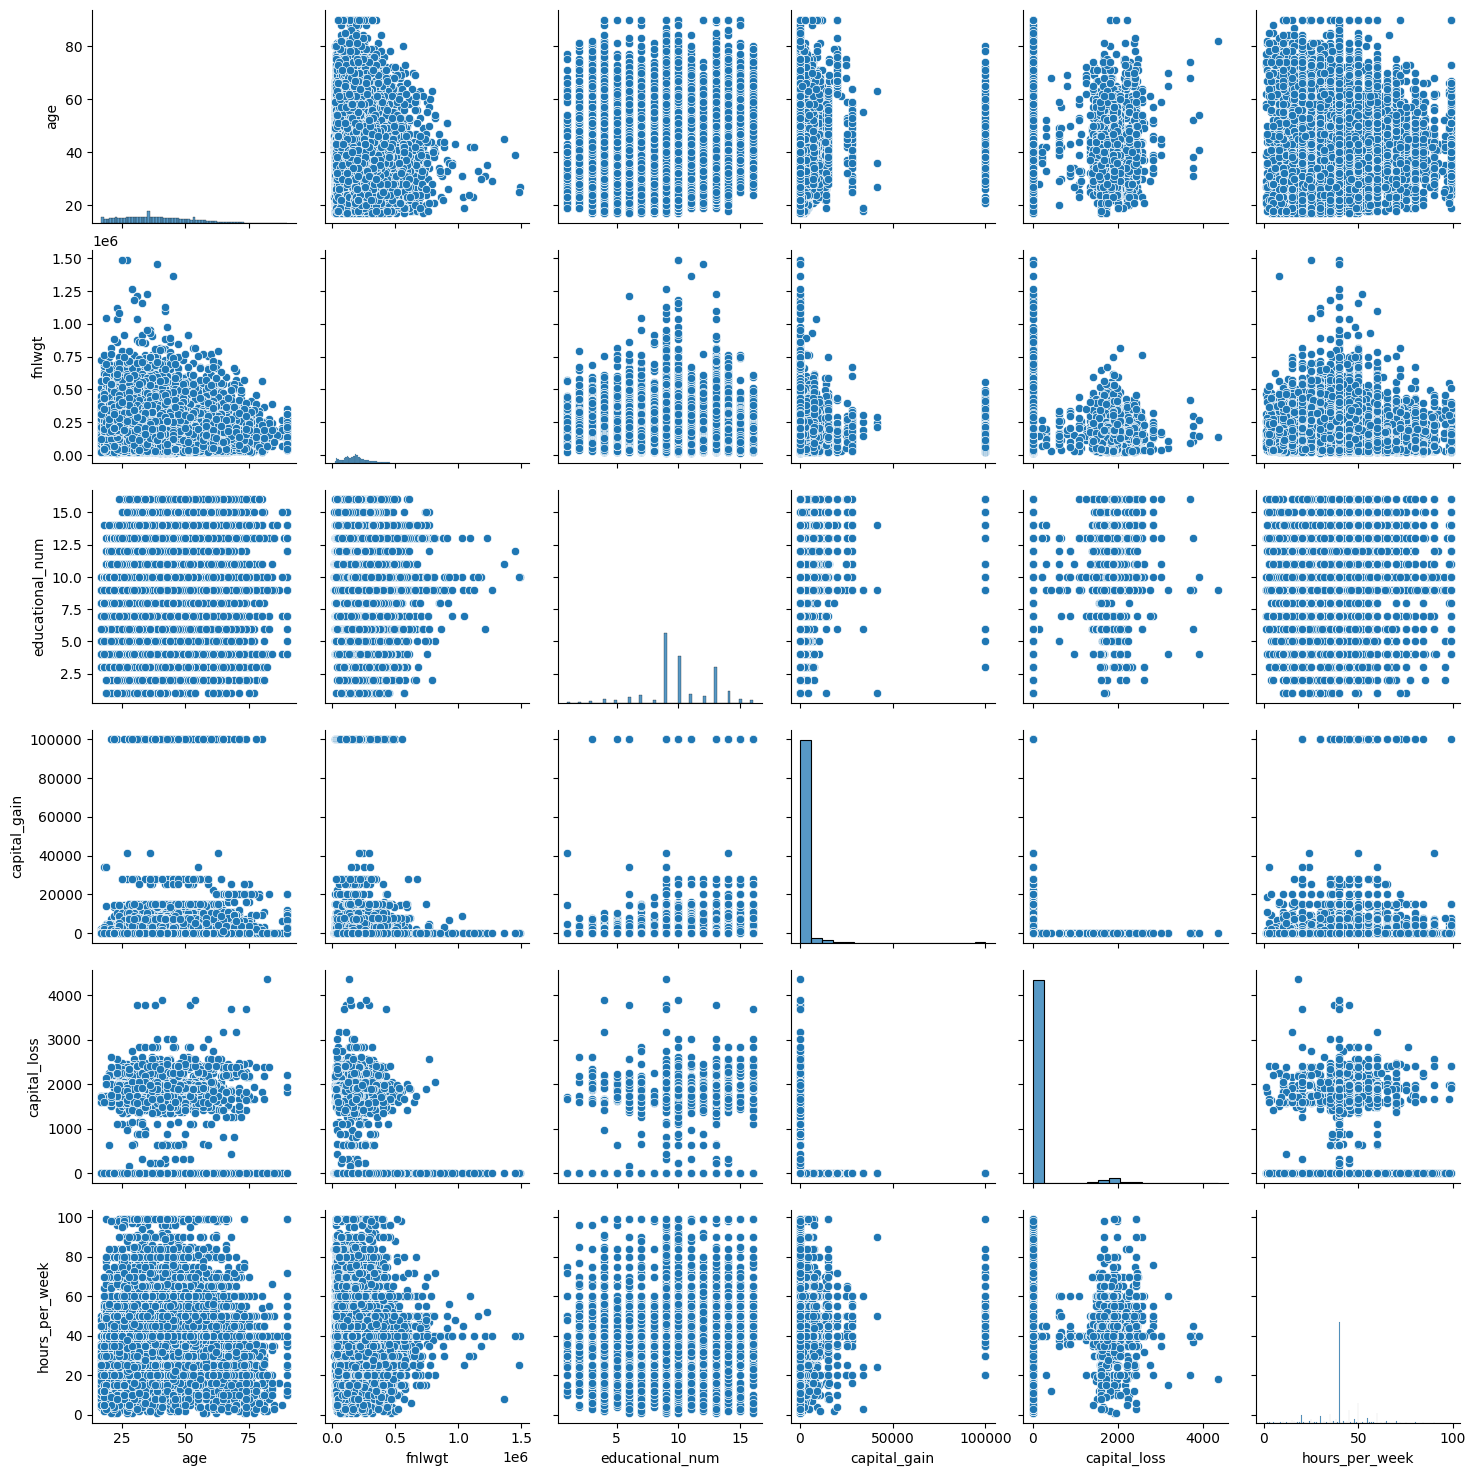

In [19]:
sns.pairplot(df_adult_clean)

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
df_adult_clean['workclass'].value_counts()

workclass
Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: count, dtype: int64

In [22]:
df_adult_clean['education'].value_counts()

education
HS-grad         14783
Some-college     9899
Bachelors        7570
Masters          2514
Assoc-voc        1959
11th             1619
Assoc-acdm       1507
10th             1223
7th-8th           823
Prof-school       785
9th               676
12th              577
Doctorate         544
5th-6th           449
1st-4th           222
Preschool          72
Name: count, dtype: int64

In [23]:
df_adult_clean['occupation'].value_counts()

occupation
Craft-repair         6020
Prof-specialty       6008
Exec-managerial      5984
Adm-clerical         5540
Sales                5408
Other-service        4808
Machine-op-inspct    2970
Transport-moving     2316
Handlers-cleaners    2046
Farming-fishing      1480
Tech-support         1420
Protective-serv       976
Priv-house-serv       232
Armed-Forces           14
Name: count, dtype: int64

In [24]:
# Ну конечно же США - абсолютный лидер, куда же без них))

df_adult_clean['native_country'].value_counts()

native_country
United-States                 41292
Mexico                          903
Philippines                     283
Germany                         193
Puerto-Rico                     175
Canada                          163
India                           147
El-Salvador                     147
Cuba                            133
England                         119
China                           113
Jamaica                         103
South                           101
Italy                           100
Dominican-Republic               97
Japan                            89
Guatemala                        86
Vietnam                          83
Columbia                         82
Poland                           81
Haiti                            69
Portugal                         62
Iran                             56
Taiwan                           55
Greece                           49
Nicaragua                        48
Peru                             45
Ecuador      

In [25]:
df_adult.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational_num',
       'marital_status', 'occupation', 'relationship', 'race', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [26]:
df_adult_clean_select1 = df_adult_clean[['occupation', 'hours_per_week', 'gender', 'race', 'income']]

In [27]:
X = pd.get_dummies(df_adult_clean_select1, columns=['occupation', 'hours_per_week', 'gender', 'race'])

del X['income']

X.head()

,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,...,hours_per_week_97,hours_per_week_98,hours_per_week_99,gender_Female,gender_Male,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,True,False,False
1,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
3,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,True,False,False
5,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True


In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [29]:
le.fit(df_adult_clean_select1['income'])

LabelEncoder()

In [30]:
le.classes_

array(['<=50K', '>50K'], dtype=object)

In [31]:
le.transform(['<=50K', '>50K', '<=50K', '>50K'])

array([0, 1, 0, 1])

In [32]:
y = pd.Series(data=le.transform(df_adult_clean_select1['income']))
y.head()

0    0
1    0
2    1
3    1
4    0
dtype: int64

In [33]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [36]:
model.score(X_train, y_train) 

0.7829094929710946

In [37]:
model.score(X_test,y_test)

0.788309869536375

In [38]:
from sklearn.svm import SVC

# используем пайплайны
clf = make_pipeline(StandardScaler(), SVC()) 
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [39]:
clf.score(X_train, y_train) 

0.7828779023850893

In [40]:
clf.score(X_test, y_test)

0.7846244564015626

In [41]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [42]:
svc.score(X_train, y_train)

0.7857210551255726

In [43]:
svc.score(X_test, y_test)

0.7860986216554876

### Вообщем и с SVM и без получилась примерно одинаковая точность модели. Около 78%. Модель разрабатывала путем комбинации разных колонок. 78% оказался лучший результат